In [ ]:
%pip install ..

In [ ]:
import spuco.datasets as dsets
from spuco.datasets.base_spuco_dataset import SpuriousFeatureDifficulty

In [ ]:
import torchvision.transforms as T 

dataset = dsets.spuco_mnist.SpuCoMNIST(
    root="/data/mnist/",
    spurious_feature_difficulty=SpuriousFeatureDifficulty.MAGNITUDE_EASY,
    spurious_correlation_strength=[0.2, 0.9],
    classes=[[0],[1]],
    label_noise=0.4,
    core_feature_noise=1.0,
    transform=T.ToPILImage()
)
dataset.initialize()

In [ ]:
len(dataset)

In [ ]:
dataset.group_weights

In [ ]:
dataset[5][0].resize((28*4, 28*4))

In [ ]:
label_noise_idx = []
for i, (label, clean_label) in enumerate(zip(dataset.data.labels, dataset.data.clean_labels)):
    if label != clean_label: 
        label_noise_idx.append(i)
        

In [ ]:
len(label_noise_idx)

In [ ]:
core_feature_noise_idx = []
for i in range(len(dataset)):
    if dataset.data.core_feature_noise[i]:
        core_feature_noise_idx.append(i)

In [ ]:
display(dataset[core_feature_noise_idx[6]][0].resize((28*4, 28*4)))

In [ ]:
t = T.ToTensor()(dataset[core_feature_noise_idx[6]][0])

In [ ]:
import torch 
(torch.randn_like(t[0, :, :]) > 0.5).unsqueeze(dim=0).repeat(3, 1, 1).shape

In [1]:
%pip install ..
import spuco.datasets as dsets
from spuco.datasets.base_spuco_dataset import SpuriousFeatureDifficulty, SpuriousCorrelationStrength
import torchvision.transforms as T 

dataset = dsets.SpuCoCT(
    root="/data/spuco_ct",
    spurious_feature_difficulty=SpuriousFeatureDifficulty.MAGNITUDE_EASY,
    spurious_correlation_strength=SpuriousCorrelationStrength.UNIFORM,
    label_noise=0.4,
    core_feature_noise=1.0,
    transform=T.ToPILImage(),
    verbose=True
)
dataset.initialize()

Processing /home/sjoshi/spuco
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for spuco: filename=spuco-0.0.1-py3-none-any.whl size=91486 sha256=9784a0738661c605fbdb4d144e43027aa53a316475256f2ea74dfc2a63d4bcc9
  Stored in directory: /tmp/pip-ephem-wheel-cache-ebmho1ic/wheels/ef/5d/43/a265894b1d52121a51705a208277e8d9a9670e95fa1a2e7ae6
Successfully built spuco
  Attempting uninstall: spuco
    Found existing installation: spuco 0.0.1
    Uninstalling spuco-0.0.1:
      Successfully uninstalled spuco-0.0.1
Note: you may need to restart the kernel to use updated packages.
Assembling SpuCoCT


loading 3_normal: 100%|██████████| 100/100 [00:03<00:00, 29.77it/s]


Spurious patches created
Label noise determined.
Feature noise determined.


Adding spurious feature to class 3: 100%|██████████| 100/100 [00:15<00:00,  6.25it/s]


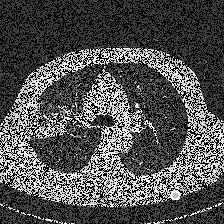

In [12]:
dataset[53][0]

In [3]:
dataset.spurious_patch[dataset.data.spurious[0]].shape[0]

5

In [4]:
to_image = T.ToPILImage()

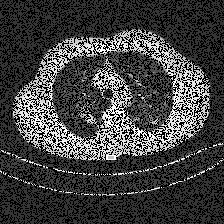

In [5]:
display(to_image(dataset.data.X[0]))

In [6]:
from typing import Tuple 
import torch 

def place_spurious(
    tensor_img: torch.Tensor, 
    patch_size: Tuple[int, int], 
    mask_start: Tuple[int, int], 
    mask_end: Tuple[int, int], 
    pixel_brightness: int = 150
):
    mask = torch.zeros_like(tensor_img)
    mask[mask_start[0]:mask_end[0], mask_start[1]:mask_end[1]] = 1.
    placement = mask * (tensor_img > pixel_brightness / 255)
    
    display(to_image(mask))
    display(to_image(tensor_img))
    display(to_image(placement))
    # Iterate backwards to place spurious feature
    candidates = {}
    for i in range(mask_end[0], mask_start[0] + patch_size[0], -1):
        for j in range(mask_end[1], mask_start[1] + patch_size[1], -1):
            candidates[i-patch_size[0], j-patch_size[1]] = torch.sum(placement[i-patch_size[0]:i, j-patch_size[1]:j]) / (patch_size[0] * patch_size[1])
            if torch.sum(placement[i-patch_size[0]:i, j-patch_size[1]:j]) / (patch_size[0] * patch_size[1]) > 0.9:
                return i-patch_size[0], j-patch_size[1]
    print(max(candidates.values()))
    return None

In [7]:
to_image = T.ToPILImage()

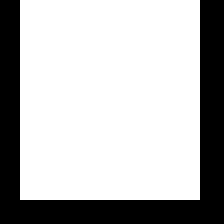

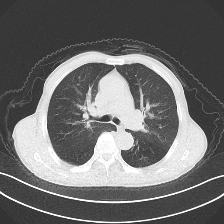

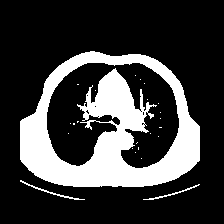

(177, 143)


In [8]:
print(place_spurious(dataset.debugparams[0], dataset.debugparams[1], dataset.debugparams[2], dataset.debugparams[3]))

In [9]:
%pip install ..

Processing /home/sjoshi/spuco
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for spuco: filename=spuco-0.0.1-py3-none-any.whl size=91486 sha256=31fe645746a175294f2693e85e0e2563107429aa3b41b723dcf9e263cdb8b174
  Stored in directory: /tmp/pip-ephem-wheel-cache-59oo4gzy/wheels/ef/5d/43/a265894b1d52121a51705a208277e8d9a9670e95fa1a2e7ae6
Successfully built spuco
^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from torchvision.datasets import ImageFolder 
from torchvision import transforms as T
to_tensor = T.ToTensor()
dset=ImageFolder("/data/spuco_ct/train/", transform=to_tensor)

In [ ]:
from spuco.datasets import SourceData 

sd = SourceData(dset)

In [9]:
from spuco.datasets import SpuCoBirds, SpuCoDogs
import torchvision.transforms as T 

dataset = SpuCoDogs(
    root="/data",
    label_noise=0.01,
    transform=T.ToPILImage()
)
dataset.initialize()

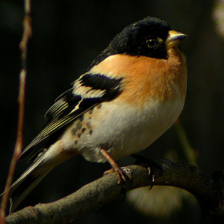

In [ ]:
display(dataset[1][0])

In [ ]:
dataset.group_weights

{(0, 0): 0.4714285714285714,
 (1, 0): 0.02857142857142857,
 (0, 1): 0.02819047619047619,
 (1, 1): 0.4718095238095238}